<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Image Samples

In [1]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

In [2]:
path = "/content/119563240_779088996173762_8588093001503046386_n.png"
# path = "/content/threshold.png"

#Get all of the coordinates of the edge of the segmented mask(Red Version)

In [3]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
# rgb = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

# # set lower and upper bounds color blue color
# lower = (0, 0, 220)
# upper = (100, 100, 255)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)

# # for i in range(112):
# #   for j in range(112):
# #     if img[i, j][2] > 200 and img[i, j][1]< 100:
# #       print(i, j, img[i, j] )


# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Blue Version

[[58, 28], [58, 29], [58, 30], [58, 31], [58, 32], [58, 33], [58, 34], [58, 35], [58, 36], [58, 37], [58, 38], [58, 39], [58, 40], [58, 41], [58, 42], [58, 43], [58, 44], [58, 45], [58, 46], [58, 47], [57, 48], [56, 48], [56, 49], [56, 50], [56, 51], [56, 52], [56, 53], [56, 54], [56, 55], [56, 56], [56, 57], [55, 58], [55, 59], [54, 60], [54, 61], [54, 62], [54, 63], [54, 64], [54, 65], [54, 66], [54, 67], [54, 68], [54, 69], [53, 70], [52, 70], [52, 71], [52, 72], [52, 73], [52, 74], [52, 75], [51, 76], [50, 76], [50, 77], [50, 78], [50, 79], [51, 79], [52, 80], [52, 81], [52, 82], [52, 83], [53, 83], [54, 84], [55, 84], [56, 84], [57, 85], [56, 86], [56, 87], [57, 87], [58, 88], [58, 89], [59, 89], [60, 89], [61, 89], [62, 89], [63, 89], [64, 90], [64, 91], [65, 91], [66, 91], [67, 91], [68, 91], [69, 91], [70, 92], [70, 93], [71, 93], [72, 93], [73, 93], [74, 93], [75, 93], [76, 93], [77, 93], [77, 92], [78, 91], [79, 91], [79, 90], [80, 89], [81, 89], [81, 88], [82, 87], [83, 87],

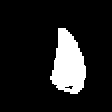

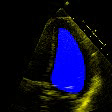

In [4]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (0,0,100)
upper = (50,50,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)


# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(thresh)
cv2_imshow(img)
# cv2_imshow(opening)
# cv2_imshow(closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Mask from binary mask

In [5]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (200,200,200)
# upper = (255,255,255)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)

# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(img)
# cv2_imshow(thresh)

# # cv2_imshow(opening)
# # cv2_imshow(closing)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [6]:
pointGroups = []
index = 0
subgroup = [points[0]]

for i in range(len(points) - 1):
  prevPoint = points[i]
  currentPoint = points[i+1]

  if abs(prevPoint[0]-currentPoint[0]) <= 1 and abs(prevPoint[1]-currentPoint[1]) <= 1:
    subgroup.append(currentPoint)
  else:
    pointGroups.append(subgroup[:])
    subgroup = [currentPoint]

pointGroups.append(subgroup)

mainPointGroup = []
maxPointGroupSize = 0

for group in pointGroups:
  if len(group) > maxPointGroupSize:
    maxPointGroup = group
    maxPointGroupSize = len(group)

points = maxPointGroup[:]

# Top 5 and Bottom 5 Analysis(Heuristic 2)


In [7]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 15

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  if point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

if slope > 0:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)
else:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
condition = True
if slope > 0:
  while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX += 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr -= 1
else:
  while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX -= 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr += 1

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()


# Finding Min Top and Max Bottom
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

x1, y1 = TopCoord
x2, y2 = BottomCoord

if (x1 + y1) > (x2 + y2):
  x1, y1, x2, y2 = x2, y2, x1, y1

print(x1, y1, x2, y2)

64 28 68 91


# Calculate Weighted Average

In [8]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[67.80952380952381, 88.0], [67.61904761904762, 85.0], [67.42857142857143, 82.0], [67.23809523809524, 79.0], [67.04761904761905, 76.0], [66.85714285714286, 73.0], [66.66666666666667, 70.0], [66.47619047619048, 67.0], [66.28571428571429, 64.0], [66.0952380952381, 61.0], [65.9047619047619, 58.0], [65.71428571428571, 55.0], [65.52380952380952, 52.0], [65.33333333333333, 49.0], [65.14285714285714, 46.0], [64.95238095238095, 43.0], [64.76190476190476, 40.0], [64.57142857142857, 37.0], [64.38095238095238, 34.0], [64.19047619047619, 31.0]]


# Find All Mask White points

In [9]:
p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherIntercept = points[lowerIndex:higherIndex]
lowerIntercept = points[higherIndex:] + points[:lowerIndex]

if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
  lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

print(lowerIntercept)
print(higherIntercept)

[[68, 91], [69, 91], [70, 92], [70, 93], [71, 93], [72, 93], [73, 93], [74, 93], [75, 93], [76, 93], [77, 93], [77, 92], [78, 91], [79, 91], [79, 90], [80, 89], [81, 89], [81, 88], [82, 87], [83, 87], [83, 86], [83, 85], [83, 84], [83, 83], [83, 82], [83, 81], [83, 80], [84, 79], [84, 78], [85, 77], [85, 76], [85, 75], [85, 74], [85, 73], [85, 72], [85, 71], [85, 70], [85, 69], [85, 68], [85, 67], [85, 66], [84, 65], [83, 64], [83, 63], [83, 62], [83, 61], [83, 60], [83, 59], [83, 58], [83, 57], [83, 56], [82, 56], [81, 55], [81, 54], [81, 53], [81, 52], [80, 52], [79, 51], [79, 50], [79, 49], [79, 48], [78, 48], [77, 47], [77, 46], [77, 45], [77, 44], [77, 43], [77, 42], [76, 42], [75, 41], [75, 40], [74, 40], [73, 39], [73, 38], [73, 37], [73, 36], [72, 36], [71, 35], [71, 34], [70, 34], [69, 33], [69, 32], [68, 32], [67, 31], [67, 30], [66, 30], [65, 29], [65, 28]]
[[64, 28], [63, 28], [62, 28], [61, 28], [60, 28], [59, 28], [58, 28], [58, 29], [58, 30], [58, 31], [58, 32], [58, 33]

In [10]:
def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  # print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, len(higherInterceptAveragePoints))
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point:
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif higherIndex + 1 >= len(higherIntercept):
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1
        print(slopeCond and not betweenCond, len(higherIntercept), higherIndex, count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, len(lowerInterceptAveragePoints))
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# False 0 1 [62, 20] [62, 19] [62.0001, 20.285714285714285] 12857.142856716035 2857.1428570479998 0.003003003003003003 61.93993993993994
# False 0 2 [63, 21] [62, 20] [62.0001, 20.285714285714285] 2857.1428570479998 0.7143571500007178 0.003003003003003003 62.93693693693694
# False 0 3 [64, 22] [63, 21] [62.0001, 20.285714285714285] 0.7143571500007178 0.8571857164286805 0.003003003003003003 63.933933933933936
# False 0 4 [65, 23] [64, 22] [62.0001, 20.285714285714285] 0.8571857164286805 0.9047920644973894 0.003003003003003003 64.93093093093093

        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point:            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif lowerIndex + 1 >= len(lowerIntercept):
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  matchedAveragePoints = [lowerInterceptAveragePoints[i] + higherInterceptAveragePoints[i] for i in range(len(lowerInterceptAveragePoints))]
  matchedAveragePoints.sort(key=lambda coord: (coord[0] + coord[2]) - perp_slope*(coord[1] + coord[3]))
  lowerInterceptAveragePoints = [[matchedAveragePoints[i][0], matchedAveragePoints[i][1]] for i in range(len(matchedAveragePoints))]
  higherInterceptAveragePoints = [[matchedAveragePoints[i][2], matchedAveragePoints[i][3]] for i in range(len(matchedAveragePoints))]

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

In [27]:
i = -1

x1, y1 = lowerIntercept[i]
x2, y2 = higherIntercept[i]

slope = getSlope([x1, y1], [x2, y2])

p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])
print(len(lowerIntercept))
print(len(higherIntercept))

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherInterceptPoints = points[lowerIndex:higherIndex]
lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
  lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

88
86


65 28
67 91
[[66.9047619047619, 88.0001], [66.80952380952381, 85.0001], [66.71428571428571, 82.0001], [66.61904761904762, 79.0001], [66.52380952380952, 76.0001], [66.42857142857143, 73.0001], [66.33333333333333, 70.0001], [66.23809523809524, 67.0001], [66.14285714285714, 64.0001], [66.04761904761905, 61.0001], [65.95238095238095, 58.0001], [65.85714285714286, 55.0001], [65.76190476190476, 52.0001], [65.66666666666667, 49.0001], [65.57142857142857, 46.0001], [65.47619047619048, 43.0001], [65.38095238095238, 40.0001], [65.28571428571429, 37.0001], [65.19047619047619, 34.0001], [65.0952380952381, 31.0001]]


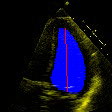

[[65, 28], [64, 28], [63, 28], [62, 28], [61, 28], [60, 28], [59, 28], [58, 28], [58, 29], [58, 30], [58, 31], [58, 32], [58, 33], [58, 34], [58, 35], [58, 36], [58, 37], [58, 38], [58, 39], [58, 40], [58, 41], [58, 42], [58, 43], [58, 44], [58, 45], [58, 46], [58, 47], [57, 48], [56, 48], [56, 49], [56, 50], [56, 51], [56, 52], [56, 53], [56, 54], [56, 55], [56, 56], [56, 57], [55, 58], [55, 59], [54, 60], [54, 61], [54, 62], [54, 63], [54, 64], [54, 65], [54, 66], [54, 67], [54, 68], [54, 69], [53, 70], [52, 70], [52, 71], [52, 72], [52, 73], [52, 74], [52, 75], [51, 76], [50, 76], [50, 77], [50, 78], [50, 79], [51, 79], [52, 80], [52, 81], [52, 82], [52, 83], [53, 83], [54, 84], [55, 84], [56, 84], [57, 85], [56, 86], [56, 87], [57, 87], [58, 88], [58, 89], [59, 89], [60, 89], [61, 89], [62, 89], [63, 89], [64, 90], [64, 91], [65, 91], [66, 91]]
[[67, 91], [68, 91], [69, 91], [70, 92], [70, 93], [71, 93], [72, 93], [73, 93], [74, 93], [75, 93], [76, 93], [77, 93], [77, 92], [78, 91]

In [28]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for j in range(len(lowerInterceptAveragePoints)): 
    cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,0,0), 1)

for point in lowerInterceptAveragePoints:
  if point == [42, 56]:
    cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)

cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)

print(lowerInterceptPoints)
print(higherInterceptPoints)
print(weighted_avg)
print(lowerInterceptAveragePoints)
print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

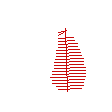

In [29]:
blank_image = np.zeros((112, 112, 3), dtype="uint8")
blank_image.fill(255)
for j in range(len(lowerInterceptAveragePoints)): 
    cv2.line(blank_image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (10,10,200), 1)
cv2.line(blank_image, (x1, y1), (x2, y2), (10,10,200), 1)

cv2_imshow(blank_image)

# Split points into 2

In [14]:
# def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
#   # Calculate perpendicular slope
#   try:
#     perp_slope = -1/slope
#   except:
#     perp_slope = 10000

#   # Indexing
#   lowerIndex = 0
#   higherIndex = 0

#   # Make sure its from top to bottom direction
#   if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
#     weighted_avg = weighted_avg[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
#       higherIntercept = higherIntercept[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
#       lowerIntercept = lowerIntercept[::-1]

#   higherInterceptAveragePoints = []
#   lowerInterceptAveragePoints = []

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = higherIntercept[higherIndex]
#         if higherIndex == 0:
#           prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = higherIntercept[higherIndex-1]
        
#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(higherIntercept)/2:
#           higherIndex -= count
#           if higherIndex == 0:
#             higherInterceptAveragePoints.append(start_point)
#           else:
#             higherInterceptAveragePoints.append(higherIntercept[higherIndex])
#           condition = False
        
#         count += 1
#         higherIndex += 1
#     except:
#       higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = lowerIntercept[lowerIndex]
#         if lowerIndex == 0:
#           prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = lowerIntercept[lowerIndex-1]

#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(lowerIntercept)/2:
#           lowerIndex -= count
#           if lowerIndex == 0:
#             lowerInterceptAveragePoints.append(start_point)
#           else:
#             lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
#           condition = False
        
#         count += 1
#         lowerIndex += 1
#     except:
#       lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  
#   if i == 30:
#       print(higherIntercept)
#       print(lowerIntercept)
#       print(weighted_avg)
#       print(lowerInterceptAveragePoints)
#       print(higherInterceptAveragePoints)
#   return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

#  \


In [15]:
# i = 30

# x1, y1 = lowerIntercept[i]
# x2, y2 = higherIntercept[i]

# print(x1, y1, x2, y2)

# slope = getSlope([x1, y1], [x2, y2])

# p1Index = points.index([x1, y1])
# p2Index = points.index([x2, y2])

# lowerIndex = min(p1Index, p2Index)
# higherIndex = max(p1Index, p2Index)

# higherInterceptPoints = points[lowerIndex:higherIndex]
# lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

# if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
#   lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

# weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
# lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

68 91
64 28
[[64.19047619047619, 31.0001], [64.38095238095238, 34.0001], [64.57142857142857, 37.0001], [64.76190476190476, 40.0001], [64.95238095238095, 43.0001], [65.14285714285714, 46.0001], [65.33333333333333, 49.0001], [65.52380952380952, 52.0001], [65.71428571428571, 55.0001], [65.9047619047619, 58.0001], [66.0952380952381, 61.0001], [66.28571428571429, 64.0001], [66.47619047619048, 67.0001], [66.66666666666667, 70.0001], [66.85714285714286, 73.0001], [67.04761904761905, 76.0001], [67.23809523809524, 79.0001], [67.42857142857143, 82.0001], [67.61904761904762, 85.0001], [67.80952380952381, 88.0001]]


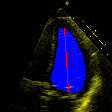

In [16]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)


# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Method of Disks

In [17]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

31341.46401392162


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [18]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area * long_axis_length

print(volume)

79656.37632363681


# Prolate Ellipsoid Model (Biplane Area Length)

In [19]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

27929.907290748986


# Bullet Method


In [20]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

area = math.pi * (midLength/2)**2 

# Volume Calc
volume = 5/6 * area * long_axis_length

print(volume)

34912.38411343624


# Will become local file


# Angle Shift

In [21]:
# import cv2
# import numpy as np
# import math
# import os

# # Gets all the contours for certain image
# def obtainContourPoints(path):
#   # read image
#   img = cv2.imread(path)
#   rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#   # set lower and upper bounds on blue color
#   lower = (200,200,200)
#   upper = (255,255,255)

#   # threshold and invert so hexagon is white on black background
#   thresh = cv2.inRange(rgb, lower, upper)

#   # get contours
#   result = np.zeros_like(thresh)
#   contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#   contours = contours[0] if len(contours) == 2 else contours[1]

#   # Gets all contour points
#   points = []
#   for pt in contours:
#       for i in pt:
#         for coord in i:
#           points.append(coord.tolist())
  
#   return points

# def getIdealPointGroup(points):
#   pointGroups = []
#   index = 0
#   subgroup = [points[0]]

#   for i in range(len(points) - 1):
#     prevPoint = points[i]
#     currentPoint = points[i+1]

#     if (abs(int(prevPoint[0])-int(currentPoint[0])) <= 1) and (abs(int(prevPoint[1])-int(currentPoint[1])) <= 1):
#       subgroup.append(currentPoint)
#     else:
#       pointGroups.append(subgroup[:])
#       subgroup = [currentPoint]

#   pointGroups.append(subgroup)

#   mainPointGroup = []
#   maxPointGroupSize = 0

#   for group in pointGroups:
#     if len(group) > maxPointGroupSize:
#       maxPointGroup = group
#       maxPointGroupSize = len(group)

#   return maxPointGroup

# # Finds points for main contour line
# def getTopAndBottomCoords(points):
#   # Minimum and Maximum Y Coord
#   maxY = max(points, key = lambda point: point[1])
#   minY = min(points, key = lambda point: point[1])

#   # MinY and MaxY With the limits
#   minYWith5 = minY[1] + 5
#   maxYWithout5 = maxY[1] - 15

#   # Creating these arrays
#   minYWith5Arr = []
#   maxYWithout5Arr = []

#   # Finding these points
#   for point in points:
#     if point[1] == minYWith5:
#       minYWith5Arr.append(point)
#     if point[1] == maxYWithout5:
#       maxYWithout5Arr.append(point)

#   # Average X Coordinates
#   averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
#   averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
#   slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

#   averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
#   averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


#   # Creating these arrays
#   averageTopXArr = []
#   averageBottomXArr = []

#   # Finding these points
#   condition = True
#   if slope > 0:
#     while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
#       for point in points:
#         if point[0] == averageTopX:
#           averageTopXArr.append(point)
#         if point[0] == averageBottomX:
#           averageBottomXArr.append(point)
#       if len(averageTopXArr) > 0 and len(averageBottomXArr):
#         condition = False
#       if len(averageTopXArr) == 0:
#         averageTopX += 1
#       if len(averageBottomXArr) == 0:
#         averageBottomXArr -= 1
#   else:
#     while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
#       for point in points:
#         if point[0] == averageTopX:
#           averageTopXArr.append(point)
#         if point[0] == averageBottomX:
#           averageBottomXArr.append(point)
#       if len(averageTopXArr) > 0 and len(averageBottomXArr):
#         condition = False
#       if len(averageTopXArr) == 0:
#         averageTopX -= 1
#       if len(averageBottomXArr) == 0:
#         averageBottomXArr += 1

#   # Sorting Arrs
#   averageTopXArr.sort(key=lambda point: point[1])
#   averageBottomXArr.sort(key=lambda point: point[1])
#   averageBottomXArr.reverse()


#   # Finding Min Top and Max Botpp,
#   TopCoord = averageTopXArr[0]
#   BottomCoord = averageBottomXArr[0]

#   x1, y1 = TopCoord
#   x2, y2 = BottomCoord

#   return (x1, y1, x2, y2)


# # Create the 20 equally spaced points
# def getWeightedAveragePoints(x1, y1, x2, y2, number):
#   weighted_avg = []

#   for n in range(1, number+1, 1):
#     x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
#     y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
#     weighted_avg.append([x_perpendicular, y_perpendicular])

#   for pair in weighted_avg:
#     x, y = pair
#     if x == int(x):
#       pair[0] += 0.0001
#     if y == int(y):
#       pair[1] += 0.0001

#   return weighted_avg

# # Intercept slope
# def calcExpectedIntercept(x, y, slope):
#   return slope*x - y

# def splitPoints(x1, y1, x2, y2, slope, points):
#   p1Index = points.index([x1, y1])
#   p2Index = points.index([x2, y2])

#   lowerIndex = min(p1Index, p2Index)
#   higherIndex = max(p1Index, p2Index)

#   higherIntercept = points[lowerIndex:higherIndex]
#   lowerIntercept = points[higherIndex:] + points[:lowerIndex]

#   return (lowerIntercept, higherIntercept)

# # Distance Between 2 Pointss
# def getDistance(point1, point2):
#   return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# # Slope between points 
# def getSlope(point1, point2):
#   if ((point1[0] == point2[0])):
#     return -333
#   return (point1[1] - point2[1])/(point1[0] - point2[0])

# # Change to Method of Disks
# def volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
#   # Long axis length and perp initialzation
#   distance = getDistance([x1, y1], [x2, y2])
#   parallelSeperationDistance = distance/(number + 1)

#   # Simpson Volume Methods
#   volume = 0

#   for i in range(len(lowerInterceptAveragePoints)):
#     diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
#     radius = diameter/2
#     diskVolume = math.pi * radius**2 * parallelSeperationDistance
#     volume += diskVolume

#   return volume

# # Prolate Ellipsoid Method
# def volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
#   long_axis_length = getDistance([x1, y1], [x2, y2])
#   parallelSeperationDistance = long_axis_length/21

#   # Manual Area Calc
#   area = 0

#   for i in range(len(lowerInterceptAveragePoints)):
#     length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
#     diskArea = length * parallelSeperationDistance
#     area += diskArea

#   volume = 0.85 * area * long_axis_length

#   return volume

# # Bullet Method Calculation
# def volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
#   # Long axis Length
#   long_axis_length = getDistance([x1, y1], [x2, y2])

#   # Storing all perp lens
#   lengthArr = []

#   for i in range(len(lowerInterceptAveragePoints)):
#     length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
#     lengthArr.append(length)

#   midIndex = len(lengthArr)//2
#   midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

#   area = math.pi * (midLength/2)**2 

#   # Volume Calc
#   volume = 5/6 * area * long_axis_length

#   return volume

# def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
#   # Calculate perpendicular slope
#   try:
#     perp_slope = -1/slope
#   except:
#     perp_slope = 10000

#   # Indexing
#   lowerIndex = 0
#   higherIndex = 0

#   # Make sure its from top to bottom direction
#   if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
#     weighted_avg = weighted_avg[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
#       higherIntercept = higherIntercept[::-1]
  
#   # print(higherIntercept)

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
#       lowerIntercept = lowerIntercept[::-1]

#   higherInterceptAveragePoints = []
#   lowerInterceptAveragePoints = []

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         higherIndex = max(higherIndex, len(higherInterceptAveragePoints))
#         point = higherIntercept[higherIndex]
#         if higherIndex == 0:
#           prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = higherIntercept[higherIndex-1]
        
#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         count += 1
#         higherIndex += 1

#         if perp_slope == 10000:
#           if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
#             higherInterceptAveragePoints.append(point)
#             condition = False
#             higherIndex -= 1
#         elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
#           if slopeCond and not betweenCond:
#             higherInterceptAveragePoints.append(point)
#             condition = False
#             higherIndex -= 1
#           elif (abs(perp_slope) > 6) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
#             higherInterceptAveragePoints.append(point)
#             condition = False
#             higherIndex -= 1
#           elif (abs(slope) > 6) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
#             higherInterceptAveragePoints.append(point)
#             condition = False
#             higherIndex -= 1
#           elif higherIndex + 1 >= len(higherIntercept):
#             higherIndex -= count
#             if higherIndex == 0:
#               higherInterceptAveragePoints.append(start_point)
#             else:
#               higherInterceptAveragePoints.append(higherIntercept[higherIndex])
#             condition = False
#             higherIndex -= 1
#         # print(slopeCond and not betweenCond, len(higherIntercept), higherIndex, count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
#     except:
#       higherInterceptAveragePoints.append(higherIntercept[-1])
  
#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         lowerIndex = max(lowerIndex, len(lowerInterceptAveragePoints))
#         point = lowerIntercept[lowerIndex]

#         if lowerIndex == 0:
#           prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = lowerIntercept[lowerIndex-1]


#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
#         # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# # False 0 1 [62, 20] [62, 19] [62.0001, 20.285714285714285] 12857.142856716035 2857.1428570479998 0.003003003003003003 61.93993993993994
# # False 0 2 [63, 21] [62, 20] [62.0001, 20.285714285714285] 2857.1428570479998 0.7143571500007178 0.003003003003003003 62.93693693693694
# # False 0 3 [64, 22] [63, 21] [62.0001, 20.285714285714285] 0.7143571500007178 0.8571857164286805 0.003003003003003003 63.933933933933936
# # False 0 4 [65, 23] [64, 22] [62.0001, 20.285714285714285] 0.8571857164286805 0.9047920644973894 0.003003003003003003 64.93093093093093

#         count += 1
#         lowerIndex += 1

#         if perp_slope == 10000:
#           if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):            
#             lowerInterceptAveragePoints.append(point)
#             condition = False
#             lowerIndex -= 1
#         elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
#           if slopeCond and not betweenCond:            
#             lowerInterceptAveragePoints.append(point)
#             condition = False
#             lowerIndex -= 1
#           elif (abs(perp_slope) > 6) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
#             lowerInterceptAveragePoints.append(point)
#             condition = False
#             lowerIndex -= 1
#           elif (abs(slope) > 6) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
#             lowerInterceptAveragePoints.append(point)
#             condition = False
#             lowerIndex -= 1
#           elif lowerIndex + 1 >= len(lowerIntercept):
#             lowerIndex -= count
#             if lowerIndex == 0:
#               lowerInterceptAveragePoints.append(start_point)
#             else:
#               lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
#             condition = False
#             lowerIndex -= 1
#         # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
#     except:
#       lowerInterceptAveragePoints.append(lowerIntercept[-1])

#   matchedAveragePoints = [lowerInterceptAveragePoints[i] + higherInterceptAveragePoints[i] for i in range(len(lowerInterceptAveragePoints))]
#   matchedAveragePoints.sort(key=lambda coord: (coord[0] + coord[2]) - perp_slope*(coord[1] + coord[3]))
#   lowerInterceptAveragePoints = [[matchedAveragePoints[i][0], matchedAveragePoints[i][1]] for i in range(len(matchedAveragePoints))]
#   higherInterceptAveragePoints = [[matchedAveragePoints[i][2], matchedAveragePoints[i][3]] for i in range(len(matchedAveragePoints))]

#   return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


# def calculateVolume(path, number, sweeps = 15, method = "Method of Disks"):
#   points = getIdealPointGroup(obtainContourPoints(path))

#   x1, y1, x2, y2 = getTopAndBottomCoords(points)
#   if (x1 + y1) > (x2 + y2):
#     x1, y1, x2, y2 = x2, y2, x1, y1

#   mainLineSlope = getSlope([x1, y1], [x2, y2])
#   baseAngle = math.atan(mainLineSlope)

#   if baseAngle>0:
#       baseAngle -= math.pi
#   lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

#   if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
#     lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

#   volumes = {}
#   x1s = {}
#   y1s = {}
#   x2s = {}
#   y2s = {}
#   degrees = {}

#   # Volumes for all 0 to 5 cases
#   for i in range(-sweeps, sweeps+1, 1):
#     print(i, len(lowerIntercept), len(higherIntercept))
#     print(lowerIntercept)
#     print(higherIntercept)
#     x1, y1 = lowerIntercept[i]
#     x2, y2 = higherIntercept[i]


#     slope = getSlope([x1, y1], [x2, y2])
#     angle = math.atan(slope)

#     if angle>0:
#       angle -= math.pi

#     degrees[i] = (baseAngle - angle) * 180/math.pi


#     p1Index = points.index([x1, y1])
#     p2Index = points.index([x2, y2])

#     lowerIndex = min(p1Index, p2Index)
#     higherIndex = max(p1Index, p2Index)

#     higherInterceptPoints = points[lowerIndex:higherIndex]
#     lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

#     if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
#       lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

#     weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
#     lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
#     x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
#     y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

#     x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
#     y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

#     # if i < 100:
#     #   print(i)
#     #   image = cv2.imread(path) 


#     #   # for point in points:
#     #   #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
#     #   #   if point[0] <50:
#     #   #     print(point)


#     #   # for point in weighted_avg: 
#     #   #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
#     #   for j in range(len(lowerInterceptAveragePoints)): 
#     #     cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


#     #   cv2.line(image, (x1, y1), (x2, y2), (0,0,0), 1)

#     #   cv2_imshow(image)
#     #   cv2.waitKey(0)
#     #   cv2.destroyAllWindows()

#     if  method == "Method of Disks":
#       volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
#     elif method == "Prolate Ellipsoid":
#       volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
#     elif method == "Bullet Method":
#       volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
#   return (volumes, x1s, y1s, x2s, y2s, degrees)

# print(calculateVolume(path, 20, 30, method = "Method of Disks"))
# # print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
# # print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
# # print(calculateVolume("/content/output/image.png", method = "Bullet"))

IndexError: ignored

In [37]:
import cv2
import numpy as np
import math
import os

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (0,0,100)
  upper = (50,50,255)
  
  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  result = np.zeros_like(thresh)
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  return points

def getIdealPointGroup(points):
  pointGroups = []
  index = 0
  subgroup = [points[0]]


  for i in range(len(points) - 1):
    prevPoint = points[i]
    currentPoint = points[i+1]

    if (abs(int(prevPoint[0])-int(currentPoint[0])) <= 1) and (abs(int(prevPoint[1])-int(currentPoint[1])) <= 1):
      subgroup.append(currentPoint)
    else:
      pointGroups.append(subgroup[:])
      subgroup = [currentPoint]

  pointGroups.append(subgroup)

  mainPointGroup = []
  maxPointGroupSize = 0

  for group in pointGroups:
    if len(group) > maxPointGroupSize:
      maxPointGroup = group
      maxPointGroupSize = len(group)

  return maxPointGroup

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 15

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    if point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
  slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  condition = True
  if slope > 0:
    while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX += 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr -= 1
  else:
    while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX -= 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr += 1

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()


  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherIntercept = points[lowerIndex:higherIndex]
  lowerIntercept = points[higherIndex:] + points[:lowerIndex]

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Change to Method of Disks
def volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

# Prolate Ellipsoid Method
def volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = long_axis_length/21

  # Manual Area Calc
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  volume = 0.85 * area * long_axis_length

  return volume

# Bullet Method Calculation
def volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lens
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  area = math.pi * (midLength/2)**2 

  # Volume Calc
  volume = 5/6 * area * long_axis_length

  return volume

def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  # print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, len(higherInterceptAveragePoints))
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point:
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif higherIndex + 1 >= len(higherIntercept):
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1
        # print(slopeCond and not betweenCond, len(higherIntercept), higherIndex, count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, len(lowerInterceptAveragePoints))
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# False 0 1 [62, 20] [62, 19] [62.0001, 20.285714285714285] 12857.142856716035 2857.1428570479998 0.003003003003003003 61.93993993993994
# False 0 2 [63, 21] [62, 20] [62.0001, 20.285714285714285] 2857.1428570479998 0.7143571500007178 0.003003003003003003 62.93693693693694
# False 0 3 [64, 22] [63, 21] [62.0001, 20.285714285714285] 0.7143571500007178 0.8571857164286805 0.003003003003003003 63.933933933933936
# False 0 4 [65, 23] [64, 22] [62.0001, 20.285714285714285] 0.8571857164286805 0.9047920644973894 0.003003003003003003 64.93093093093093

        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point:            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif lowerIndex + 1 >= len(lowerIntercept):
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  matchedAveragePoints = [lowerInterceptAveragePoints[i] + higherInterceptAveragePoints[i] for i in range(len(lowerInterceptAveragePoints))]
  matchedAveragePoints.sort(key=lambda coord: (coord[0] + coord[2]) - perp_slope*(coord[1] + coord[3]))
  lowerInterceptAveragePoints = [[matchedAveragePoints[i][0], matchedAveragePoints[i][1]] for i in range(len(matchedAveragePoints))]
  higherInterceptAveragePoints = [[matchedAveragePoints[i][2], matchedAveragePoints[i][3]] for i in range(len(matchedAveragePoints))]

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

# Angle Shifts
def calculateVolumeAngleShift(path, number, sweeps = 15, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1

  mainLineSlope = getSlope([x1, y1], [x2, y2])

  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
  degrees = {}

  # Volumes for all 0 to 5 cases
  for i in range(-sweeps, sweeps+1, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]

    slope = getSlope([x1, y1], [x2, y2])

    try:
      degree = math.atan((mainLineSlope-slope)/(1+mainLineSlope*slope)) * 180/math.pi
    except:
      degree = 90

    if (degree > 0 and i < 0): 
      degree = -180+degree

    elif (degree < 0 and i > 0):
      degree = 180+degree

    degrees[i] = degree
    
    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
      lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    if i < 100:
      print(i)
      image = cv2.imread(path) 


      # for point in points:
      #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
      #   if point[0] <50:
      #     print(point)


      # for point in weighted_avg: 
      #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
      for j in range(len(lowerInterceptAveragePoints)): 
        cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


      cv2.line(image, (x1, y1), (x2, y2), (0,0,0), 1)

      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()


    if  method == "Method of Disks":
      volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s, degrees)

# Main Axis Shifts
def calculateVolumeMainAxisShift(path, number, pointShifts = 15, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1
  
  mainLineSlope = getSlope([x1, y1], [x2, y2])

  xChange = 1/math.sqrt(1+mainLineSlope**2) * abs(mainLineSlope)/mainLineSlope
  yChange = abs(mainLineSlope/math.sqrt(1+mainLineSlope**2))

  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}

  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherInterceptPoints = points[lowerIndex:higherIndex]
  lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

  if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
    lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

  # Volumes for all 0 to 5 cases
  for i in range(0, pointShifts):
    # x1, y1 = lowerIntercept[i]
    # x2, y2 = higherIntercept[i]

    x1 += xChange
    x2 -= xChange
    y1 += yChange
    y2 -= yChange

    slope = getSlope([x1, y1], [x2, y2])

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    if i < 100:
      print(i)
      image = cv2.imread(path) 


      # for point in points:
      #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
      #   if point[0] <50:
      #     print(point)


      # for point in weighted_avg: 
      #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
      for j in range(len(lowerInterceptAveragePoints)): 
        cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


      cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,0), 1)

      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()


    if  method == "Method of Disks":
      volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s)

0


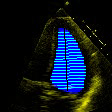

1


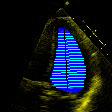

2


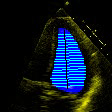

3


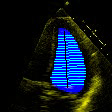

4


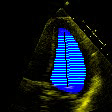

5


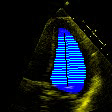

6


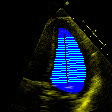

7


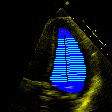

8


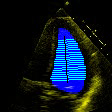

9


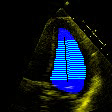

10


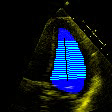

11


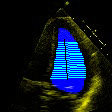

12


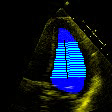

13


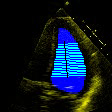

14


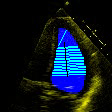

15


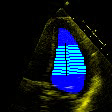

16


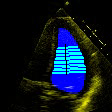

17


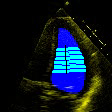

18


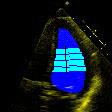

19


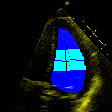

20


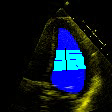

21


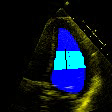

22


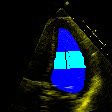

23


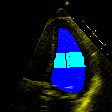

24


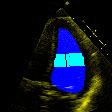

25


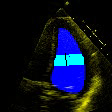

26


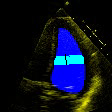

27


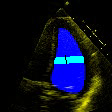

28


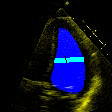

29


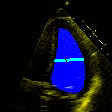

({0: 30563.393409778342, 1: 30268.811771703768, 2: 29843.182807317637, 3: 28711.785786969802, 4: 28413.238901799672, 5: 27771.920753727045, 6: 27036.46005962145, 7: 26182.536276620824, 8: 25218.218296997213, 9: 24337.661587283652, 10: 23425.884883997976, 11: 22245.709999729417, 12: 21182.195741461004, 13: 19938.652583891417, 14: 18711.73396516512, 15: 17763.638313254036, 16: 16665.841457567512, 17: 15646.267606624362, 18: 14427.86249013815, 19: 13248.322848946736, 20: 12140.540772047381, 21: 11050.61490843095, 22: 9876.53146548828, 23: 8740.165255696962, 24: 7627.78576673524, 25: 6505.986799667411, 26: 5391.864002578043, 27: 4267.899427705331, 28: 3141.5333894771447, 29: 1923.0297046491376}, {0: [64.06336447318279, 58, 58, 58, 58, 58, 58, 56, 56, 50, 56, 54, 54, 52, 55, 51, 52, 53, 54, 57, 58], 1: [64.12672894636557, 58, 58, 58, 58, 58, 58, 56, 56, 56, 54, 50, 54, 52, 55, 52, 52, 53, 54, 54, 56], 2: [64.19009341954836, 58, 58, 58, 58, 57, 58, 56, 56, 56, 54, 50, 54, 55, 52, 52, 52, 52,

In [38]:
# print(calculateVolumeAngleShift(path, 20, 30, method = "Method of Disks"))

print(calculateVolumeMainAxisShift(path, 20, 30, method = "Method of Disks"))

